# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

### 1. Import the student hours and scores dataset.


number of samples is: 25
number of features is: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


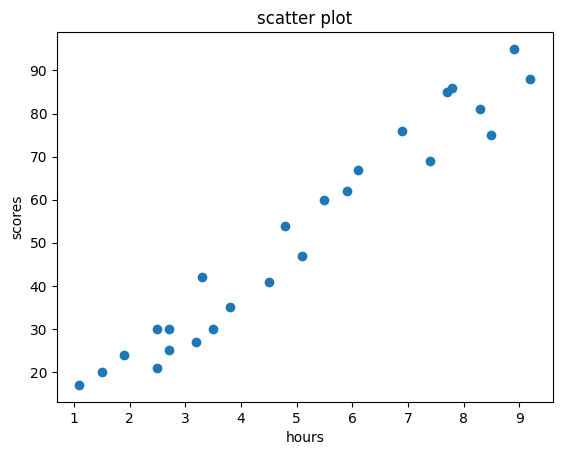

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("student_scores.csv")
df.head()

#04
print(f'number of samples is: {len(df)}')
print(f'number of features is: {len(df.columns)}')
#05
df.info(verbose = True)
#06
print(df.describe())
#07
plt.scatter(df['Hours'], df['Scores'])
plt.title('scatter plot')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

### 1. Split the dataset into training and testing sets.


In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
df = pd.read_csv("student_scores.csv")
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0) 
print("Training set X :", x_train.shape)
print("Test set X:", x_test.shape)
print("Training set Y :", y_train.shape)
print("Test set Y :", y_test.shape)

Training set X : (20, 1)
Test set X: (5, 1)
Training set Y : (20,)
Test set Y : (5,)


### 2. Train the data using the LinearRegression module from sklearn. 


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("The slope (B1):", model.coef_)
print("The intercept (B0):", model.intercept_)

The slope (B1): [9.91065648]
The intercept (B0): 2.0181600414346974


### 3. Display the model's equation.


The equation is : y = B0 + B1 * x 
where B0 == intercept
B1 == slope 
SO:
score = intercept + slope * hours

### 4. Create a plot showing the data and the generated model.


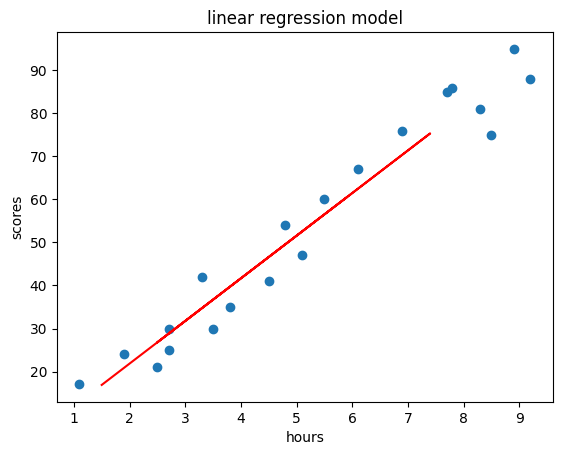

In [29]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.plot(x_test, model.predict(x_test), color='red')
plt.title('linear regression model')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

### 5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# prediction = model.predict(x_test)
# mae= mean_absolute_error(y_test, prediction)
# mse= mean_squared_error(y_test, prediction)
# rmse= np.sqrt(mse)
# r_square= r2_score(y_test, prediction)

# print(f'mae is: {mae}')
# print(f'rmse is: {rmse}')
# print(f'R² is: {r_square}')
# Display the model's performance on training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}")
print("\nTest Set Performance:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}")


Training Set Performance:
MAE: 5.19, MSE: 30.90, RMSE: 5.56, R-squared: 0.95

Test Set Performance:
MAE: 4.18, MSE: 21.60, RMSE: 4.65, R-squared: 0.95


### 6. Describe the R-squared metric and its advantages compared to the other metrics.


Is more precise than the other metrics that depends on  the data volume but r-squared give a good value.

### 7. Is the generated model characterized by good performance?


yes bcz the r-squared is 94% a high performaance that mean the prediction values are fits . and that is mean no overfitting (well in training low in test)

### 8. Create a plot visualizing the difference between actual and predicted values.


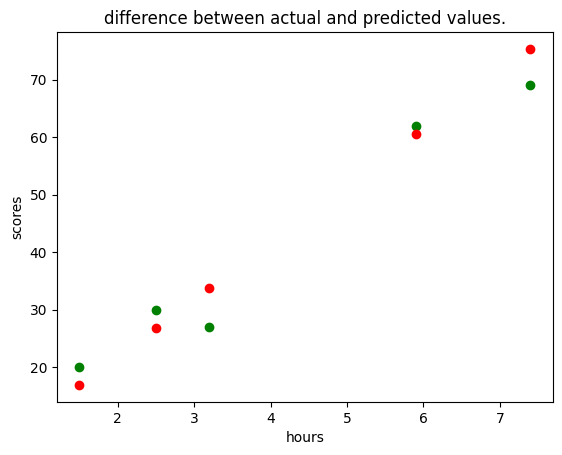

In [36]:
plt.scatter(x_test, y_test , color='green')
plt.scatter(x_test, model.predict(x_test), color='red')
plt.title('difference between actual and predicted values.')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()